# Google Stock Predicition using LSTM

## Necessary downloads

In [13]:
!pip install pydot
!pip install graphviz

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


## Necessary Imports

In [14]:
# Basic data manipulation packages
import numpy as np 
import pandas as pd 
import os

# Visualization
import matplotlib.pyplot as plt
from keras.utils import plot_model

# Data Pre-processing
from sklearn.preprocessing import MinMaxScaler

# LSTM Model Construction
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


## Loading and Pre-processing the data

### Load the training data

In [15]:
dataset_train = pd.read_csv("../input/googledta/trainset.csv")
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


In [16]:
trainset = dataset_train.iloc[:,1:2].values
trainset

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

### Perform Min Max scaling 

In [17]:
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)
training_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

### Split data in 60 parts for LSTM input

In [18]:
x_train = []
y_train = []
for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [19]:
x_train.shape

(1199, 60)

In [20]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(1199, 60, 1)


In [21]:
## LSTM Model

### Model Constrcuction

In [22]:
model = Sequential()
model.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)               

### Model Structure

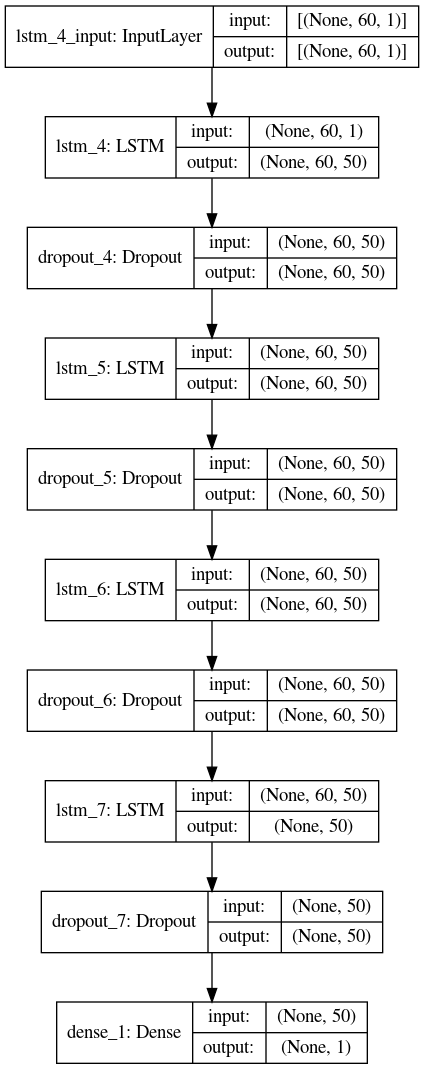

In [23]:
plot_model(model, show_shapes=True, show_layer_names=True)

### Training the LSTM Model

In [24]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 6s 15ms/step - loss: 0.0688
Epoch 2/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0052
Epoch 3/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0049
Epoch 4/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0038
Epoch 5/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0036
Epoch 6/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0037
Epoch 7/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0034
Epoch 8/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0032
Epoch 9/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0036
Epoch 10/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0033
Epoch 11/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0033
Epoch 12/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0029
Epoch 13/100
38/38 [=====

38/38 [==============================] - 1s 15ms/step - loss: 0.0010


## Testing the trained model

### Loading the test data

In [26]:
dataset_test = pd.read_csv("../input/googledta/testset.csv")
real_stock_price = dataset_test.iloc[:,1:2].values
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
dataset_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 1384, dtype: float64

### Pre-processing the data

In [27]:
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [28]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

### Predict the prices 

In [29]:
predicted_price = model.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1052.9142],
       [1051.6044],
       [1053.9849],
       [1062.5243],
       [1074.1165],
       [1085.2671],
       [1094.0317],
       [1097.1335],
       [1097.3367],
       [1096.1156],
       [1099.8572],
       [1106.1453],
       [1112.8318],
       [1118.0697],
       [1122.1622],
       [1128.7648],
       [1139.1633],
       [1148.7816],
       [1155.381 ],
       [1158.9283],
       [1158.9625],
       [1157.8599],
       [1156.0005],
       [1148.0424],
       [1132.8608],
       [1107.402 ],
       [1089.4017],
       [1080.0844],
       [1071.644 ],
       [1067.9786],
       [1068.1512],
       [1070.269 ],
       [1076.7737],
       [1085.809 ],
       [1093.4429],
       [1099.753 ],
       [1105.1929],
       [1108.1958],
       [1111.201 ],
       [1116.3375],
       [1119.0294],
       [1116.484 ],
       [1102.6697],
       [1088.0829],
       [1082.9568],
       [1085.2924],
       [1094.8505],
       [1109.5306],
       [1127.6117],
       [1143.7103],


### model predicition visualization

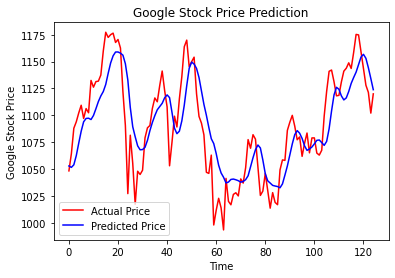

In [30]:
plt.plot(real_stock_price,color = 'green', label = 'Actual Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()